In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from ontocluster import OntoClusterer

In [11]:
try:
    from word2number import w2n
except:
    !pip install word2number
    from word2number import w2n

In [12]:
data = pd.read_csv('automobile.csv')
data.drop(['symboling', 'normalized-losses'], 1, inplace = True)
data.replace('?', np.nan, inplace = True)
data.dropna(inplace = True)

data[['bore', 'stroke']] = data[['bore', 'stroke']].astype(float)
data[['horsepower', 'peak-rpm']] = data[['horsepower', 'peak-rpm']].astype(int)

data['num-of-doors'] = data['num-of-doors'].apply(w2n.word_to_num)
data['num-of-cylinders'] = data['num-of-cylinders'].apply(w2n.word_to_num)

data.drop_duplicates(inplace = True)
X = pd.get_dummies(data)

pca = PCA()
X_dec = pca.fit_transform(X)

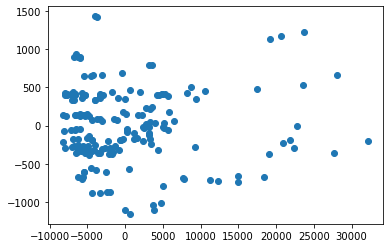

In [13]:
plt.scatter(X_dec[:, 0], X_dec[:, 1]);

In [16]:
model = OntoClusterer('hdbscan')
model.score(X)

,Time,Silhouette score,Calinski-Harabasz score,Davies-Bouldin score
HDBSCAN,10.0,0.44580729635727917,163.7692363805373,2.7971325455345633
XMeans,19.0,0.380461195584039,1494.3914336466237,0.7161293293061524
Affinity Propagation,60.0,0.4472413402057638,1387.1471175863599,0.6251303154927408
Mean Shift,522.0,0.62621234615663,625.2542932149623,0.49714561627917186
Best,Lower,1,Higher,0


In [6]:
%%time
model = OntoClusterer('meanshift')
onto = model.fit(X, data, grid_params = {'bandwidth':[2, 3, 4, 5, 6], 'max_iter':[300, 600, 900]}, scoring = 'silhouette_score')
onto.save('meanshift.owl')

[[{'bandwidth': 2, 'max_iter': 300}, 0.04096012281734844], [{'bandwidth': 2, 'max_iter': 600}, 0.04096012281734844], [{'bandwidth': 2, 'max_iter': 900}, 0.04096012281734844], [{'bandwidth': 3, 'max_iter': 300}, 0.04096012281734844], [{'bandwidth': 3, 'max_iter': 600}, 0.04096012281734844], [{'bandwidth': 3, 'max_iter': 900}, 0.04096012281734844], [{'bandwidth': 4, 'max_iter': 300}, 0.04096012281734844], [{'bandwidth': 4, 'max_iter': 600}, 0.04096012281734844], [{'bandwidth': 4, 'max_iter': 900}, 0.04096012281734844], [{'bandwidth': 5, 'max_iter': 300}, 0.04096012281734844], [{'bandwidth': 5, 'max_iter': 600}, 0.04096012281734844], [{'bandwidth': 5, 'max_iter': 900}, 0.04096012281734844], [{'bandwidth': 6, 'max_iter': 300}, 0.04096012281734844], [{'bandwidth': 6, 'max_iter': 600}, 0.04096012281734844], [{'bandwidth': 6, 'max_iter': 900}, 0.04096012281734844]]
0
Wall time: 3.18 s


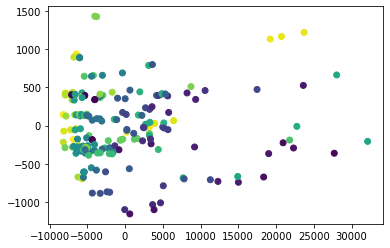

In [7]:
fig, ax = plt.subplots()
ax.scatter(X_dec[:, 0], X_dec[:, 1], c = model.model.labels_);

In [8]:
%%time
model = OntoClusterer('affinitypropagation')
onto = model.fit(X, data, grid_params = {'max_iter':range(100, 1000, 100)}, scoring = 'silhouette_score')
onto.save('affinitypropagation.owl')

C:\Users\aeivanov\Programs\anaconda\lib\site-packages\sklearn\cluster\_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "
C:\Users\aeivanov\Programs\anaconda\lib\site-packages\sklearn\cluster\_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "
C:\Users\aeivanov\Programs\anaconda\lib\site-packages\sklearn\cluster\_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduce

[[{'max_iter': 100}, 0.4472413402057638], [{'max_iter': 200}, 0.4472413402057638], [{'max_iter': 300}, 0.4472413402057638], [{'max_iter': 400}, 0.4472413402057638], [{'max_iter': 500}, 0.4472413402057638], [{'max_iter': 600}, 0.4472413402057638], [{'max_iter': 700}, 0.4472413402057638], [{'max_iter': 800}, 0.4472413402057638], [{'max_iter': 900}, 0.4472413402057638]]
0


C:\Users\aeivanov\Programs\anaconda\lib\site-packages\sklearn\cluster\_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


TypeError: unsupported operand type(s) for -: 'NoneType' and 'type'

In [14]:
%%time
model = OntoClusterer('xmeans')
onto = model.fit(X, data, grid_params = {'kmax':range(0, 100, 10)}, scoring = 'silhouette_score')
onto.save('xmeans.owl')

[[{'kmax': 0}, 0.7173936362832605], [{'kmax': 10}, 0.45624829071366513], [{'kmax': 20}, 0.3869849081810605], [{'kmax': 30}, 0.346795456008951], [{'kmax': 40}, 0.36066073247593966], [{'kmax': 50}, 0.30963507221241454], [{'kmax': 60}, 0.2571600652912429], [{'kmax': 70}, 0.3247712273697516], [{'kmax': 80}, 0.2679617984050655], [{'kmax': 90}, 0.2971059571351756]]
0


TypeError: unsupported operand type(s) for -: 'NoneType' and 'type'

In [15]:
%%time
model = OntoClusterer('hdbscan')
onto = model.fit(X, data, grid_params = {'min_cluster_size':[2, 3, 4, 5, 6, 7, 8]}, scoring = 'silhouette_score')
onto.save('hdbscan.owl')

[[{'min_cluster_size': 2}, 0.27664732351125615], [{'min_cluster_size': 3}, 0.2168702366192744], [{'min_cluster_size': 4}, 0.05994623229241896], [{'min_cluster_size': 5}, 0.44580729635727917], [{'min_cluster_size': 6}, 0.699049884985326], [{'min_cluster_size': 7}, 0.699218181545716], [{'min_cluster_size': 8}, 0.5085616769710583]]
5


KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Int64Index([60], dtype='int64'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"